Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aisse Torres"
COLLABORATORS = "Bruna Costa"

---

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
from scipy import optimize
from scipy.special import factorial
import math 

%matplotlib inline


# HW 3:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    e = 1.
    n = 0
    tol = 10e-8
    
    xp = [e]
    
    while(e > tol and n < N):
        x = g(x0)      # fixed point equation
        e = numpy.abs(x0 - x) # calculate error 
        x0 = x
        xp.append(x0)  # save the solution of the current step
        n += 1
        
    return xp

In [4]:
N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979,
                      0.79348036, 0.70136877])
x_true = 0.7390851332153119

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success!')

success!


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

Check if fixed point 

$$
    g(\sqrt{M}) = 1 + \sqrt{M} - \frac{\sqrt{M}^2}{M}
$$

$$
    g(\sqrt{M}) = 1 + \sqrt{M} - 1
$$

$$
    g(\sqrt{M}) = \sqrt{M}
$$

    It is a fixed point 
    
Analyze the convergence behavior

$$ 
    g'(x) = 1 - \frac{2x}{M} 
$$

$$ 
    g'(x) = 1 - \frac{2\sqrt{M}}{M} 
$$

$$ 
    g'(x) = 1 - \frac{2}{\sqrt{M}} 
$$

    This will only converge if:

$$ 
   |1 - \frac{2\sqrt{M}}{M}| < 1
$$

    Otherwise it will be unstable and diverge 



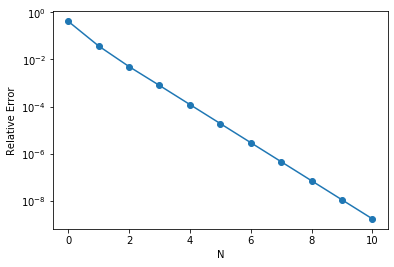

In [5]:
g = lambda x: 1 + x - (x**2)/3
x = fixed_point(g, 2, 50)
rel_error = numpy.absolute((x - numpy.sqrt(3)) / numpy.sqrt(3))
plt.semilogy(range(len(rel_error)), rel_error, '-o')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.show()

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

Check if fixed point 

$$
    g(\sqrt{M}) = \frac{M}{\sqrt{M}}
$$

$$
    g(\sqrt{M}) = M \times M^{\frac{-1}{2}}
$$

$$
    g(\sqrt{M}) = M^{\frac{-1}{2} + 1}
$$

$$
    g(\sqrt{M}) = \sqrt{M}
$$

    It is a fixed point 
    
Analyze the convergence behavior

$$ 
    g'(x) = \frac{-M}{x^{2}}
$$

$$ 
    g'(\sqrt{M}) = \frac{-M}{\sqrt{M}^{2}}
$$

$$ 
    g'(\sqrt{M}) = \frac{-M}{M}
$$

$$ 
    g'(\sqrt{M}) = -1
$$

    This does not converge since the absolute value is equal to 1, and not less than one. Further, since the derivative is -1, the error will alternate between being positive and negative 

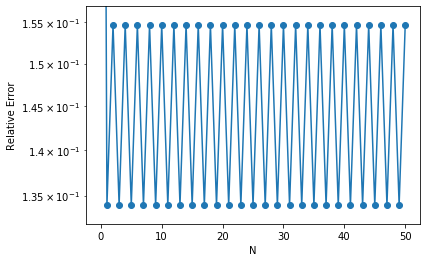

In [6]:
g = lambda x: 3 / x
x = fixed_point(g, 2, 50)
rel_error = numpy.absolute((x - numpy.sqrt(3)) / numpy.sqrt(3))
plt.semilogy(range(len(rel_error)), rel_error, '-o')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.ylim(1.32 * 10e-2, 1.57 * 10e-2)
plt.show()

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f'}$$

with $$ f = x^2 - M$$

Check if fixed point

$$ 
    g(\sqrt{M}) = \sqrt{M} - \frac{\sqrt{M}^{2}-M}{2\sqrt{M}}
$$

$$ 
    g(\sqrt{M}) = \sqrt{M} - \frac{M-M}{2\sqrt{M}}
$$

$$ 
    g(\sqrt{M}) = \sqrt{M} - \frac{0}{2\sqrt{M}}
$$

$$ 
    g(\sqrt{M}) = \sqrt{M}
$$

    It is a fixed point 

Check if converges: 

$$ 
    g'(x) = 1 - \frac{x^{2} + M}{2x^{2}}
$$

$$ 
    g'(\sqrt{M}) = 1 - \frac{\sqrt{M}^{2} + M}{2\sqrt{M}^{2}}
$$

$$ 
    g'(\sqrt{M}) = 1 - \frac{M + M}{2M}
$$

$$ 
    g'(\sqrt{M}) = 1 - \frac{2M}{2M}
$$

$$ 
    g'(\sqrt{M}) = 1 - 1
$$

$$ 
    g'(\sqrt{M}) = 0
$$

    g(x) will always converge 



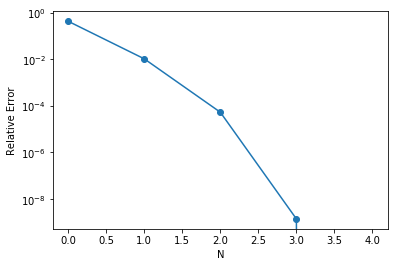

In [7]:
g = lambda x: x - ((x**2 - 3) / (2*x))
x = fixed_point(g, 2, 100)
rel_error = numpy.absolute((x - numpy.sqrt(3)) / numpy.sqrt(3))
plt.semilogy(range(len(rel_error)), rel_error, '-o')
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.show()

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use all of the routines presented in class which have been included through the convenience cell

`%run rootfinding_optimization_schemes.ipynb`

You need to have this notebook in the same directory with your homework for this notebook to validate

In [8]:
#  Cell to load and test at least newton's method from class

%run rootfinding_optimization_schemes.ipynb

# set test function and it's derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.01$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles

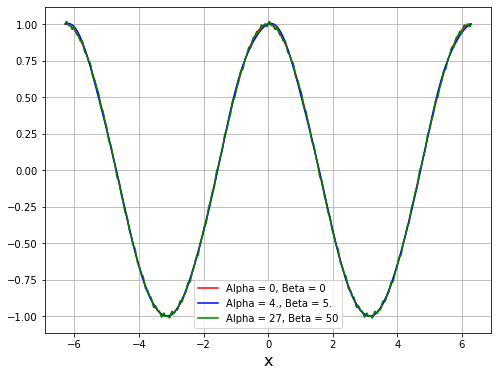

In [9]:
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.cos(x) + 0.01 * (numpy.sin(0. * x)+ numpy.sin(0. * x)), 'r', label='Alpha = 0, Beta = 0')
axes.plot(x, numpy.cos(x) + 0.01 * (numpy.sin(4. * x)+ numpy.sin(5. * x)), 'b', label='Alpha = 4., Beta = 5.')
axes.plot(x, numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x)), 'g', label='Alpha = 27, Beta = 50')
axes.set_xlabel("x",fontsize=16)
axes.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Alpha = 0, Beta = 0')

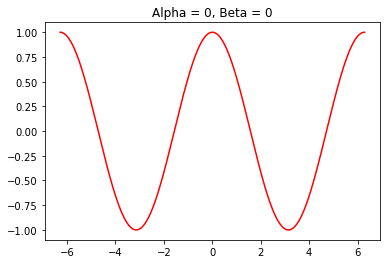

In [10]:
plt.plot(x, numpy.cos(x) + 0.01 * (numpy.sin(0. * x)+ numpy.sin(0. * x)), 'r')
plt.title('Alpha = 0, Beta = 0')

Text(0.5, 1.0, 'Alpha = 4., Beta = 5.')

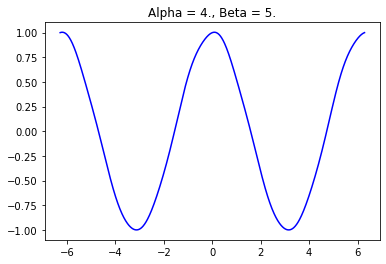

In [11]:
plt.plot(x, numpy.cos(x) + 0.01 * (numpy.sin(4. * x)+ numpy.sin(5. * x)), 'b',label='$x$')
plt.title('Alpha = 4., Beta = 5.')

Text(0.5, 1.0, 'Alpha = 27, Beta = 50')

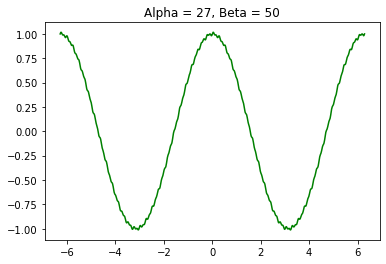

In [12]:
plt.plot(x, numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x)), 'g')
plt.title('Alpha = 27, Beta = 50')

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* scipy.optimize.brentq

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.44$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [13]:
# Bisection for Alpha = 0, Beta = 0 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(0. * x)+ numpy.sin(0. * x))
x0 = -0.44
x1 = 2.

r_star, r_array = bisection(f, x0, x1, tol=1e-8)
print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))

# Bisection for Alpha = 4., Beta = 5. 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(4. * x)+ numpy.sin(5. * x))
x0 = -0.44
x1 = 2.

r_star, r_array = bisection(f, x0, x1, tol=1e-8)
print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))

# Bisection for Alpha = 4., Beta = 5. 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x))
x0 = -0.44
x1 = 2.

r_star, r_array = bisection(f, x0, x1, tol=1e-8)
print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))
    

root at r = 1.5707963347434997, f(r*) = -7.948603047810212e-09, 24 steps
root at r = 1.5811989787220955, f(r*) = -2.143797738288211e-09, 27 steps
root at r = 1.564195497632027, f(r*) = -1.1252934434963224e-10, 26 steps


In [14]:
# Newton for Alpha = 0, Beta = 0 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(0. * x)+ numpy.sin(0. * x))
f_prime = lambda x: -numpy.sin(x) + 0.01 * (0. * numpy.cos(0. * x) + 0. * numpy.cos(0. * x))
                                            
x0 = 0.44
x, x_array = newton(f, f_prime, x0, tol=1.e-8)
print('x = {}, f(x) = {}, steps = {}'.format(x, f(x), len(x_array)))

# Newton for Alpha = 4., Beta = 5. 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(4. * x)+ numpy.sin(5. * x))
f_prime = lambda x: -numpy.sin(x) + 0.01 * (4. * numpy.cos(4. * x) + 5. * numpy.cos(5. * x))
                                            
x0 = 0.44
x, x_array = newton(f, f_prime, x0, tol=1.e-8)
print('x = {}, f(x) = {}, steps = {}'.format(x, f(x), len(x_array)))

# Newton for Alpha = 27, Beta = 50. 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x))
f_prime = lambda x: -numpy.sin(x) + 0.01 * (27 * numpy.cos(27 * x) + 50 * numpy.cos(50 * x))
                                            
x0 = 0.44
x, x_array = newton(f, f_prime, x0, tol=1.e-8)
print('x = {}, f(x) = {}, steps = {}'.format(x, f(x), len(x_array)))



x = 1.570796326795021, f(x) = -1.2428374641806015e-13, steps = 6
x = 1.5811989765596106, f(x) = -6.223304857555512e-11, steps = 6
x = 1.5641954976506995, f(x) = -1.4092768965690006e-10, steps = 8


In [15]:
# Secant for Alpha = 0, Beta = 0 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(0. * x)+ numpy.sin(0. * x))
x0 = -0.44
x1 = 2.

x, x_array = secant(f, x0, x1, tol= 1.e-8)
print('x = {}, f(x) = {}, steps = {}'.format(x, f(x), len(x_array)))

# Secant for Alpha = 4., Beta = 5. 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(4. * x)+ numpy.sin(4. * x))
x0 = -0.44
x1 = 2.

x, x_array = secant(f, x0, x1, tol= 1.e-8)
print('x = {}, f(x) = {}, steps = {}'.format(x, f(x), len(x_array)))

# Secant for Alpha = 27, Beta = 50 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x))
x0 = -0.44
x1 = 2.

x, x_array = secant(f, x0, x1, tol= 1.e-8)
print('x = {}, f(x) = {}, steps = {}'.format(x, f(x), len(x_array)))



x = 1.5707963268286453, f(x) = -3.3748720314820473e-11, steps = 6
x = 1.5707963267948966, f(x) = 5.633375276077825e-17, steps = 6
x = 1.5641954980050823, f(x) = -6.798937281227158e-10, steps = 7


In [16]:
from scipy import optimize

# scipy.optimize.brentq Alpha = 0, Beta = 0 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(0. * x)+ numpy.sin(0. * x))
x0 = -0.44
x1 = 2.

x, res = optimize.brentq(f, x0, x1, full_output=True)
print('x = {}, f(x) = {}, steps = {}'.format(x, numpy.cos(x) + 0.01 * (numpy.sin(0. * x)+ numpy.sin(0. * x)),  
                                             res.iterations))
                                            

# scipy.optimize.brentq Alpha = 4., Beta = 5. 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(4. * x)+ numpy.sin(5. * x))
x0 = -0.44
x1 = 2.

x, res = optimize.brentq(f, x0, x1, full_output=True)
print('x = {}, f(x) = {}, steps = {}'.format(x, numpy.cos(x) + 0.01 * (numpy.sin(4. * x)+ numpy.sin(5. * x)),  
                                             res.iterations))

# scipy.optimize.brentq Alpha = 27, Beta = 50 

f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x))
x0 = -0.44
x1 = 2.

x, res = optimize.brentq(f, x0, x1, full_output=True)
print('x = {}, f(x) = {}, steps = {}'.format(x, numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x)),  
                                             res.iterations))


x = 1.5707963267948966, f(x) = 6.123233995736766e-17, steps = 7
x = 1.5811989764949583, f(x) = -5.377642775528102e-17, steps = 8
x = 1.564195497558036, f(x) = 2.0383000842727483e-16, steps = 8


**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.44$.

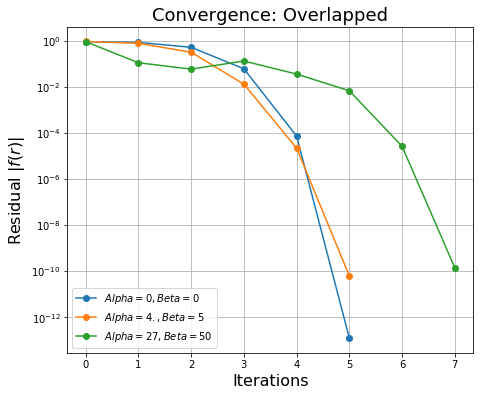

In [17]:
f = lambda r: numpy.cos(r) + 0.01 * (numpy.sin(0. * r)+ numpy.sin(0. * r))
f_prime = lambda r: -numpy.sin(r) + 0.01 * (0. * numpy.cos(0. * r) + 0. * numpy.cos(0. * r))

g = lambda r: numpy.cos(r) + 0.01 * (numpy.sin(4. * r)+ numpy.sin(5. * r))
g_prime = lambda r: -numpy.sin(r) + 0.01 * (4. * numpy.cos(4. * r) + 5. * numpy.cos(5. * r))

h = lambda r: numpy.cos(r) + 0.01 * (numpy.sin(27 * r)+ numpy.sin(50 * r))
h_prime = lambda r: -numpy.sin(r) + 0.01 * (27 * numpy.cos(27 * r) + 50 * numpy.cos(50 * r))
                                            
x0 = 0.44
x, x_array = newton(f, f_prime, x0, tol=1.e-8)

y0 = 0.44
y, y_array = newton(g, g_prime, y0, tol=1.e-8)

z0 = 0.44
z, z_array = newton(h, h_prime, z0, tol=1.e-8)

r = numpy.linspace(0.05, 0.10, 100)

# Setup figure to plot convergence
fig = plt.figure(figsize=(16,6))

axes = fig.add_subplot(1, 2, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'o-', label= r'$Alpha = 0, Beta = 0$')
axes.semilogy(numpy.arange(len(y_array)), numpy.abs(g(y_array)), 'o-', label= r'$Alpha = 4., Beta = 5.$')
axes.semilogy(numpy.arange(len(z_array)), numpy.abs(h(z_array)), 'o-', label= r'$Alpha = 27, Beta = 50$')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence: Overlapped', fontsize=18)
plt.legend()

plt.show()
                                            



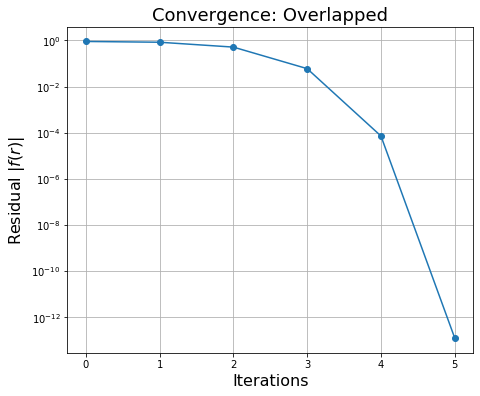

In [18]:
f = lambda r: numpy.cos(r) + 0.01 * (numpy.sin(0. * r)+ numpy.sin(0. * r))
f_prime = lambda r: -numpy.sin(r) + 0.01 * (0. * numpy.cos(0. * r) + 0. * numpy.cos(0. * r))
                                            
x0 = 0.44
x, x_array = newton(f, f_prime, x0, tol=1.e-8)

r = numpy.linspace(0.05, 0.10, 100)

# Setup figure to plot convergence
fig = plt.figure(figsize=(16,6))

axes = fig.add_subplot(1, 2, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'o-')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence: Overlapped', fontsize=18)

plt.show()

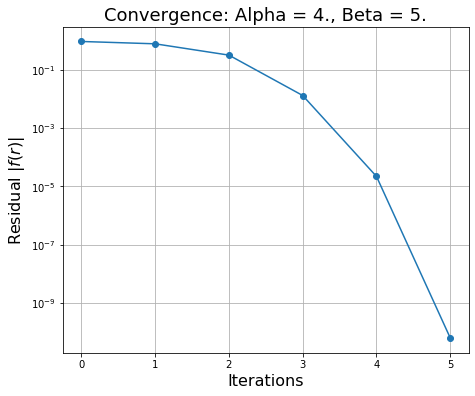

In [19]:
f = lambda r: numpy.cos(r) + 0.01 * (numpy.sin(4. * r)+ numpy.sin(5. * r))
f_prime = lambda r: -numpy.sin(r) + 0.01 * (4. * numpy.cos(4. * r) + 5. * numpy.cos(5. * r))
                                            
x0 = 0.44
x, x_array = newton(f, f_prime, x0, tol=1.e-8)

r = numpy.linspace(0.05, 0.10, 100)

# Setup figure to plot convergence
fig = plt.figure(figsize=(16,6))

axes = fig.add_subplot(1, 2, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'o-')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence: Alpha = 4., Beta = 5.', fontsize=18)

plt.show()

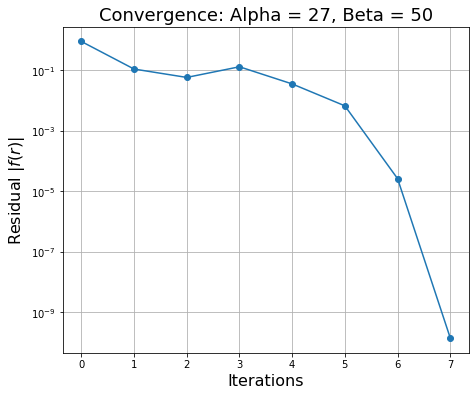

In [20]:
f = lambda r: numpy.cos(r) + 0.01 * (numpy.sin(27 * r)+ numpy.sin(50 * r))
f_prime = lambda r: -numpy.sin(r) + 0.01 * (27 * numpy.cos(27 * r) + 50 * numpy.cos(50 * r))
                                            
x0 = 0.44
x, x_array = newton(f, f_prime, x0, tol=1.e-8)

r = numpy.linspace(0.05, 0.10, 100)

# Setup figure to plot convergence
fig = plt.figure(figsize=(16,6))

axes = fig.add_subplot(1, 2, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'o-')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence: Alpha = 27, Beta = 50', fontsize=18)

plt.show()

**(d)** [4] Briefly explain your results so far.  Feel free to play with other initial parameters or to make additional plots.  

It seems like the noise for Alpha = 27 and Beta = 50 creates a couple of iterations that actually increase the error as opposed to the error exponentially decreasing for all iterations. In particular, between the second and third iteration, we get a slight increase in error back to the same level as it was for the first iteration. This is probably when the one of the points actually increases in value despite the overall decreasing movement of the graph (due to the noise). 

**(e)** [6] *Basins of Attraction* For the noisiest model $(\alpha=27, \beta=50)$, make a plot of the final root $x^*$ that Newton finds as a function of initial guess $x_0\in [0.4, 2.]$ (hint plt.ylim is your friend).  Can you estimate the width of the smooth basin of attraction near the root $x^*\approx\pi/2$?

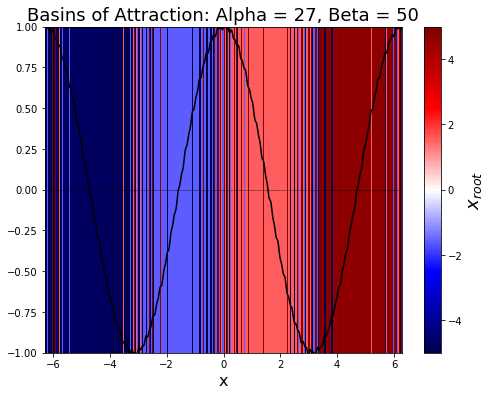

In [21]:
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi , 1000)
f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x))
f_prime = lambda x: -numpy.sin(x) + 0.01 * (27 * numpy.cos(27 * x) + 50 * numpy.cos(50 * x))
xk = lambda x: x - f(x)/f_prime(x)

x_root = numpy.zeros(x.shape)
N_steps = numpy.zeros(x.shape)
for i,xk in enumerate(x):
    x_root[i], x_root_array = newton(f, f_prime, xk)
    N_steps[i] = len(x_root_array)

y = numpy.linspace(-2,2)
X,Y = numpy.meshgrid(x,y)
X_root = numpy.outer(numpy.ones(y.shape),x_root)

plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, X_root,vmin=-5, vmax=5,cmap='seismic')
cbar = plt.colorbar()
cbar.set_label('$x_{root}$', fontsize=18)
plt.plot(x, f(x), 'k-')
plt.plot(x, numpy.zeros(x.shape),'k--', linewidth=0.5)
plt.xlabel('x', fontsize=16)
plt.title('Basins of Attraction: Alpha = 27, Beta = 50', fontsize=18)
#plt.xlim(-2 * numpy.pi, 2 * numpy.pi)
plt.ylim(-1,1)
plt.show()

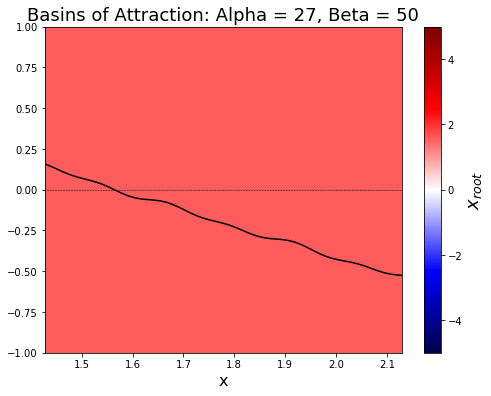

In [22]:
# this for me to zoom in to try to find the basin of attraction 

x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi , 1000)
f = lambda x: numpy.cos(x) + 0.01 * (numpy.sin(27 * x)+ numpy.sin(50 * x))
f_prime = lambda x: -numpy.sin(x) + 0.01 * (27 * numpy.cos(27 * x) + 50 * numpy.cos(50 * x))
xk = lambda x: x - f(x)/f_prime(x)

x_root = numpy.zeros(x.shape)
N_steps = numpy.zeros(x.shape)
for i,xk in enumerate(x):
    x_root[i], x_root_array = newton(f, f_prime, xk)
    N_steps[i] = len(x_root_array)

y = numpy.linspace(-2,2)
X,Y = numpy.meshgrid(x,y)
X_root = numpy.outer(numpy.ones(y.shape),x_root)

plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, X_root,vmin=-5, vmax=5,cmap='seismic')
cbar = plt.colorbar()
cbar.set_label('$x_{root}$', fontsize=18)
plt.plot(x, f(x), 'k-')
plt.plot(x, numpy.zeros(x.shape),'k--', linewidth=0.5)
plt.xlabel('x', fontsize=16)
plt.title('Basins of Attraction: Alpha = 27, Beta = 50', fontsize=18)
plt.xlim(1.4275, 2.13)
plt.ylim(-1,1)
plt.show()

Basin of attraction is between 1.4275 and 2.13 for the root at $\pi/2$

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)

In [23]:
def newtsafe(f, f_prime, a, b, tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function giving f(x)
    f_prime:  function (float)
        function giving derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f((a+b)/2)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    
    max_itr = 200
    tol = 1.e-6
    
    if (numpy.sign(a) == numpy.sign(b)):
        raise ValueError('a and b need to be of opposite signs') 
    
    h = b - a
    fa = f(a)
    fb = f(b)
    
    c = a + h / 2. 
    fc = f(c)
    c_prime = f_prime(c)
    xN = [c]
    
    n_newt = 0
    n_bisection = 0
    
    
    for i in range(max_itr):
        
        # first try newton
        while(c < a and c > b):
            c = x0
            xN = [x0]
            c = c  - f(c) / f_prime(c)
            xN.append(c)
            n_newt += 1           
        
        if numpy.abs(fc) < tol:
            break

        if numpy.sign(fa) != numpy.sign(fc):
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        
        print('Newton exceeds bracket')
        
        h = b - a
        c = a + h / 2.0
        fc = f(c)
        xN.append(c)
        n_bisection += 0 
             
    if i == max_itr:
        warnings.warn('Maximum number of steps reached')
        
    return c, n_newt, n_bisection
    
            
            
            

In [24]:
# copy and paste of the built in tester due to an issue where optimize.brentq was not called 

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.sin(a * x) + b*numpy.sin(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    x_b, res = optimize.brentq(f, a, b, full_output=True)
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(x_b, res.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, x_b,decimal=6)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')

Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 12.052997501142706,    N   = 200
NewtSafe = 1.2719482632979389,    N_n = 0, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Maximum number of steps exceeded


In [25]:
a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.sin(a * x) + b*numpy.sin(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    x_b, res = brentq(f, a, b, full_output=True)
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(x_b, res.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, x_b,decimal=6)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket
Newton exceeds bracket


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Maximum number of steps exceeded


NameError: name 'brentq' is not defined

## Question 3 - Solve some "real" rootfinding problems

Each of the following math problems will lead to a non-linear function of a single variable that will require solution by rootfinding.  For each problem, derive the non-linear function and use the rootfinding routine of your choice (or try several),  to determine the numerical solution.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 10,100, 709, 1000 and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


    Equation Using Striling's Approximation: 
    
$$ 
    f(n, x) = (n + 1)log(x) - (n + 1)log(n + 1) - (n + 1) - log(eps) = 0 
$$

    Equation: 
    
$$ 
    f(n, x) = (n + 1)log(x) - log((n + 1)!) - log(eps) = 0 
$$

    To get these equations all you have to do is use the proof from Homework 2 and move everything to the left side 
     

In [26]:
import math

# these are the functions I had made for hw 2 with some alterations for log_fact_tree

# helper method for factorial—trying to make a type of memoized solution to reduce runtime for large n 
def range_prod(lo, hi):
    if lo + 1 < hi:
        mid = (hi + lo) // 2
        return(range_prod(lo, mid) * range_prod(mid + 1, hi))
    if lo == hi:
        return(lo)
    return(lo * hi)

# actual function that should be called to compute factorial of a number n 
def factorial_tree(n):
    if n < 2:
        return(1)
    return(range_product(1, n))

def log_fact_tree(n):
    # mathematically the same values 
    f_log_fact = lambda n: numpy.log(numpy.array(range(1, int(n) + 1))).sum()
    return f_log_fact(n)
    
def log_stirling(n):
    fn = float(n)
    fn = fn * math.log(fn) - fn
    return(fn)
                                            

In [27]:
from scipy.special import factorial 

eps = numpy.finfo(float).eps
f_true = lambda n, x: (n + 1)*numpy.log(x) - log_fact_tree(n + 1) - numpy.log(eps)
f_stirlng = lambda n, x: (n + 1)*numpy.log(x) - log_stirling(n + 1) - numpy.log(eps)

for x in [10, 100, 709, 1000]:
    est = x * numpy.exp(1)
    b = est + 100
    n_true, res_true = optimize.brentq(f_true, 1, b, full_output=True, args=x)
    n_stirlng, res_stirlng = optimize.brentq(f_stirlng, 1, b, full_output=True, args=x)
    r_true = abs(n_true - est)/abs(est)
    r_stirlng = abs(n_stirlng - est)/abs(est)
    print('x = {}, n_true     = {}, e*x = {}, r_true     = {}'.format(x, n_true, numpy.exp(1) * x, r_true))
    print('x = {}, n_stirling = {}, e*x = {}, r_stirling = {}'.format(x, n_stirlng, numpy.exp(1) * x, r_stirlng))
    print('')
    
    

x = 10, n_true     = 51.999999999999034, e*x = 27.18281828459045, r_true     = 0.9129730940914647
x = 10, n_stirling = 52.39200282157358, e*x = 27.18281828459045, r_stirling = 0.9273940719853119

x = 100, n_true     = 304.0000000000001, e*x = 271.8281828459045, r_true     = 0.11835350116118515
x = 100, n_stirling = 304.8289018356016, e*x = 271.8281828459045, r_stirling = 0.12140286060185566

x = 709, n_true     = 1958.0000000000014, e*x = 1927.261816377463, r_true     = 0.01594914783312355
x = 709, n_stirling = 1961.9765738907581, e*x = 1927.261816377463, r_stirling = 0.018012476155702596

x = 1000, n_true     = 2752.0, e*x = 2718.2818284590453, r_true     = 0.012404222103809245
x = 1000, n_stirling = 2753.09065007091, e*x = 2718.2818284590453, r_stirling = 0.012805449842409288



We can see that the inequality $ n > e * x $was definitely a good basis of comparison. This is because all of the roots found are in fact greater than $ e * x $ However, we also see that there is a sizaeble gap between knowing that $n$ must be greater than $ e * x $ and the actual value of $n$. The estimate given by $ e * x $ is off by around 30 in each instance. 

We can also note that stirling's approximation gives us a very good estimate of $n$. Baring $x = 709$, the approximation is off by just around 1 point.  